In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [26]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [27]:
len(X_train)

60000

In [28]:
len(X_test)

10000

In [29]:
X_train[0].shape

(28, 28)

In [ ]:
X_train

In [ ]:
X_train[0]

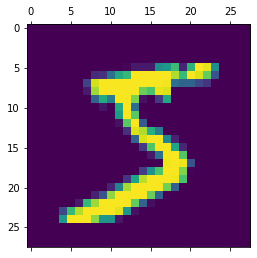

In [32]:
plt.matshow(X_train[0])

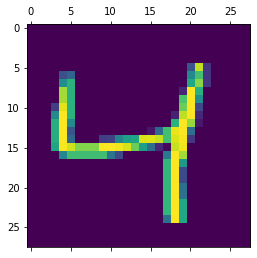

In [33]:
plt.matshow(X_train[2])

In [34]:
print(X_train[1].shape)

(28, 28)


In [35]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [36]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [37]:
len(y_train)

60000

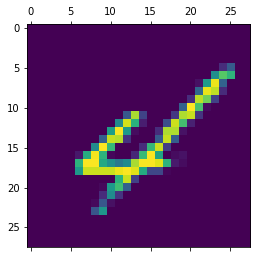

In [38]:
plt.matshow(X_train[59931])

In [39]:
X_train.shape

(60000, 28, 28)

In [40]:
X_train = X_train / 255
X_test = X_test / 255

In [41]:
print(X_train.shape)
print(X_test.shape)
X_train_flattened = X_train.reshape(len(X_train),28*28)      #into a 1-D array
X_test_flattened = X_test.reshape(len(X_test), 28*28)
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [42]:
model = keras.Sequential([               
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')   
])
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  
)
model.fit(X_train_flattened, y_train, epochs=5)  

/home/codebaker/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


2025-02-05 23:03:37.116217: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8068 - loss: 0.7335
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9123 - loss: 0.3145
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9205 - loss: 0.2861
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9228 - loss: 0.2767
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9248 - loss: 0.2653


In [43]:
model.evaluate(X_test_flattened, y_test) # Gives accuracy 92.2299..

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9121 - loss: 0.3067


[0.26921501755714417, 0.9244999885559082]

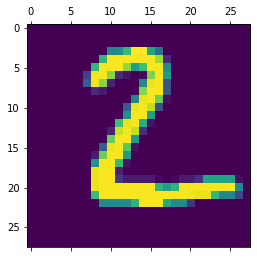

In [50]:
plt.matshow(X_test[1])

In [51]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


array([5.3665829e-01, 5.8987108e-03, 9.9941039e-01, 5.0645101e-01,
       9.7122932e-10, 8.6266851e-01, 9.0140229e-01, 7.6589890e-13,
       1.5349497e-01, 2.4821034e-09], dtype=float32)

In [52]:
np.argmax(y_predicted[1])

2

In [53]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [54]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [60]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   9,    9,  920,   22,   10,    3,   12,   10,   33,    4],
       [   3,    0,   15,  933,    1,   22,    2,   10,   16,    8],
       [   1,    2,    2,    1,  924,    0,   13,    3,    7,   29],
       [  10,    3,    2,   39,   12,  769,   18,    5,   29,    5],
       [  13,    3,    4,    2,    7,   11,  915,    2,    1,    0],
       [   1,    7,   24,    7,   10,    0,    0,  948,    1,   30],
       [  11,   13,    8,   26,   10,   28,   10,   13,  846,    9],
       [  11,    7,    1,   14,   35,    6,    0,   24,    4,  907]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

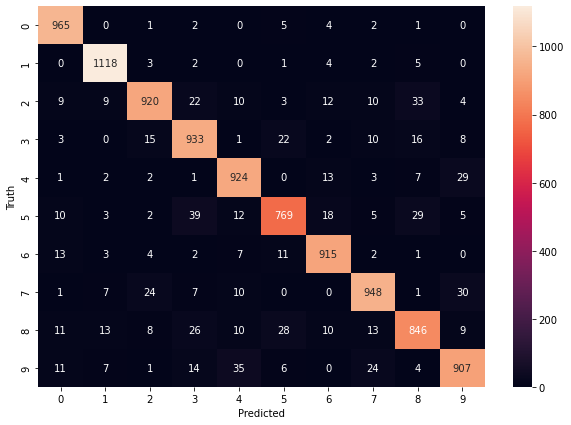

In [61]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')